In [3]:
from tensorflow import keras
from tensorflow.keras import datasets, layers
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

In [5]:
noise_channels = np.random.random((len(train_images), 784))
train_images_with_noise_channels = np.concatenate([train_images, noise_channels], axis=1)

zero_channels = np.zeros((len(train_images), 784))
train_images_with_zero_channels = np.concatenate([train_images, zero_channels], axis=1)

In [6]:
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

In [7]:
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, 
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)
history_zero = model.fit(
    train_images_with_zero_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
  1/375 [..............................] - ETA: 1:02 - loss: 2.4786 - accuracy: 0.1328

2025-06-03 23:52:28.839490: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2025-06-03 23:52:28.839735: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


375/375 [==============================] - 2s 5ms/step - loss: 0.6339 - accuracy: 0.8099 - val_loss: 0.2871 - val_accuracy: 0.9099
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2495 - accuracy: 0.9227 - val_loss: 0.1790 - val_accuracy: 0.9485
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1638 - accuracy: 0.9477 - val_loss: 0.1376 - val_accuracy: 0.9596
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1145 - accuracy: 0.9647 - val_loss: 0.1707 - val_accuracy: 0.9504
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0854 - accuracy: 0.9727 - val_loss: 0.1225 - val_accuracy: 0.9639
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0620 - accuracy: 0.9805 - val_loss: 0.1302 - val_accuracy: 0.9640
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0481 - accuracy: 0.9845 - val_loss: 0.1843 - val_accuracy: 0.9533
Epoch 8/10
375/37

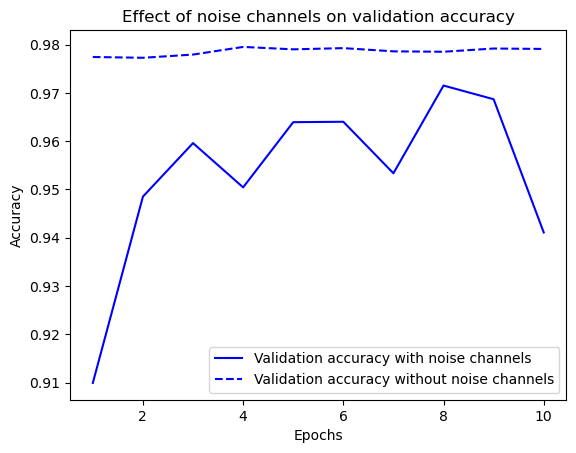

In [8]:
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zero = history_zero.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs,
         val_acc_noise,
         "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs,
         val_acc_zero,
         "b--",
         label="Validation accuracy without noise channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()